In [1]:
!sudo apt-get update -qq # 폰트 설정을 위한 코드
!sudo apt-get install fonts-nanum* -qq
!sudo fc-cache -fv

Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/texmf/fonts/opentype/public/lm
	/usr/share/texmf/fonts/opentype/public/lm-math
	/usr/share/fonts/X11
	/usr/share/fonts/cMap
	/usr/share/fonts/cmap
	/usr/share/fonts/opentype
	/usr/share/fonts/truetype
	/usr/share/fonts/type1
	/usr/share/fonts/X11/Type1
	/usr/share/fonts/X11/encodings
	/usr/share/fonts/X11/util
	/usr/share/fonts/cmap/adobe-cns1
	/usr/share/fonts/cmap/adobe-gb1
	/usr/share/fonts/cmap/adobe-japan1
	/usr/share/fonts/cmap/adobe-japan2
	/usr/share/fonts/cmap/adobe-korea1
	/usr/share/fonts/opentype/urw-base35
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
	/usr/share/fonts/type1/texlive-fonts-recommended
	/usr/share/fonts/type1/urw-base35
	/usr/share/fonts/X11/encodings/large
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents:

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packag

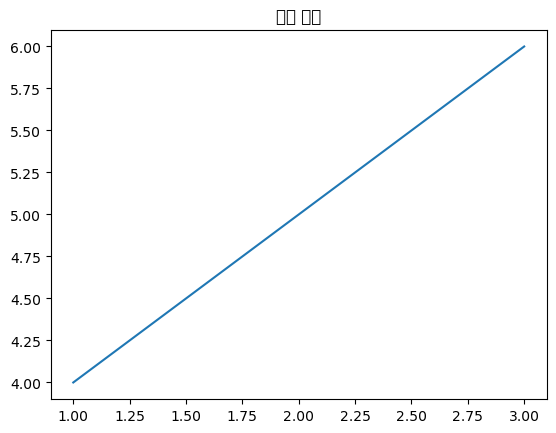

In [3]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목') # 한글 제목이 정상적으로 표시되는지 확인
plt.show()

In [4]:
import pandas as pd

# 데이터 읽기
train_data = pd.read_csv('./train.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

In [5]:
train_data.head()

,class,conversation
idx,,
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [6]:
test_data.head()

,text
idx,
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4713 entries, 0 to 4712
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         4713 non-null   object
 1   conversation  4713 non-null   object
dtypes: object(2)
memory usage: 110.5+ KB
None


In [8]:
class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
일반 대화           763
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [9]:
# 'class' 열의 고유값별 개수 세기
class_counts = train_data['class'].value_counts()

# 결과 출력
print("클래스별 데이터 개수:\n", class_counts)

# 비율 계산 및 출력
class_proportions = train_data['class'].value_counts(normalize=True) * 100
print("\n클래스별 데이터 비율 (%):\n", class_proportions)

클래스별 데이터 개수:
 class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
일반 대화           763
Name: count, dtype: int64

클래스별 데이터 비율 (%):
 class
기타 괴롭힘 대화      23.212391
갈취 대화          20.814768
직장 내 괴롭힘 대화    20.772332
협박 대화          19.011245
일반 대화          16.189264
Name: proportion, dtype: float64


In [10]:
x_train = train_data['conversation']
y_train = train_data['class']

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/tmp/ipykernel_429/1978457068.py:40: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_429/1978457068.py:40: UserWarning: Glyph 

데이터 정보
--------------------------------------------------
x_train : (4713,)
y_train : (4713,)
label 종류: {'기타 괴롭힘 대화', '갈취 대화', '협박 대화', '직장 내 괴롭힘 대화', '일반 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :214.67345639719923


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

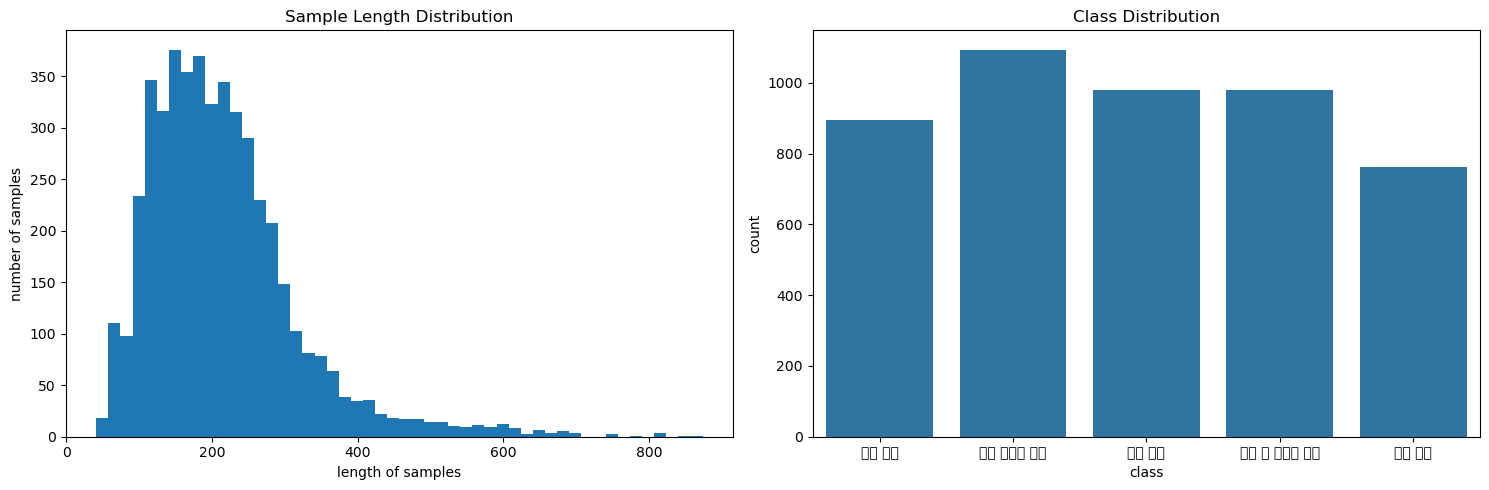

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
import numpy as np
import pandas as pd
import seaborn as sns

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

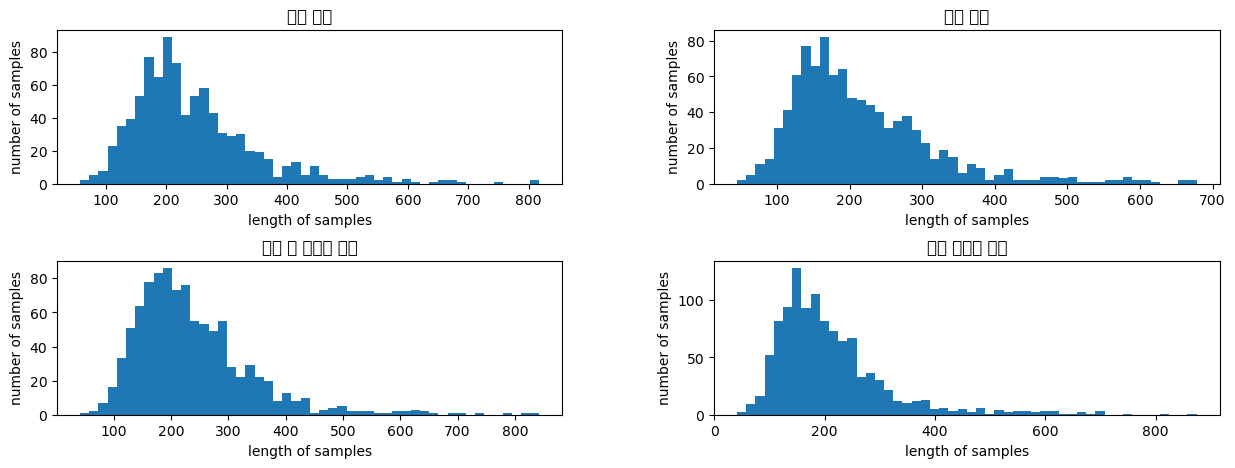

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [13]:
from collections import Counter
import re

# 불용어(stop_words) 목록 정의 (조사, 접속사 등)
# 일단은 작은 불용어 사전을 이용하여 빈도수 측정
stop_words = ['은', '는', '이', '가', '다', '을', '를', '에', '와', '과', '에서']

# 텍스트 전처리 및 키워드 추출 함수
def preprocess_korean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text) # 한글과 공백만 남기기
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1] # 불용어 및 한 글자 단어 제거
    return ' '.join(filtered_words)

# 각 클래스별 키워드 빈도 분석
for cls in train_data['class'].unique():
    class_df = train_data[train_data['class'] == cls]
    all_text = ' '.join(class_df['conversation'])
    keywords = preprocess_korean_text(all_text)

    # 상위 10개 키워드 출력
    print(f"\n--- {cls}의 주요 키워드 ---")
    print(Counter(keywords).most_common(10))


--- 협박 대화의 주요 키워드 ---
[(' ', 45973), ('이', 4044), ('가', 3626), ('어', 3577), ('지', 3276), ('아', 3254), ('고', 3071), ('니', 2942), ('다', 2923), ('그', 2637)]

--- 기타 괴롭힘 대화의 주요 키워드 ---
[(' ', 47260), ('이', 4570), ('아', 3949), ('가', 3607), ('니', 3284), ('고', 3277), ('그', 3252), ('다', 3136), ('지', 3105), ('어', 3081)]

--- 갈취 대화의 주요 키워드 ---
[(' ', 44100), ('이', 4488), ('어', 3309), ('가', 3298), ('요', 3155), ('아', 3028), ('그', 2732), ('고', 2714), ('지', 2547), ('니', 2448)]

--- 직장 내 괴롭힘 대화의 주요 키워드 ---
[(' ', 48430), ('이', 4837), ('니', 4630), ('다', 4558), ('가', 3842), ('하', 3535), ('아', 3430), ('고', 3073), ('는', 3057), ('요', 3015)]

--- 일반 대화의 주요 키워드 ---
[(' ', 25999), ('어', 3003), ('이', 2642), ('요', 2246), ('는', 1850), ('아', 1598), ('에', 1565), ('해', 1488), ('하', 1339), ('가', 1335)]


In [15]:
!pip install transformers torch scikit-learn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 30.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [transformers] [transformers]ub]


In [16]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import re

In [17]:
# 한글 전처리 함수
# def preprocess_korean_text(text):
#     # 불필요한 공백 제거
#     text = re.sub(r'\s+', ' ', text)
#     # 특수문자 정규화 (일부 보존)
#     text = re.sub(r'[^\w\s\.\!\?\,\n]', ' ', text)
#     # 연속된 문장부호 정리
#     text = re.sub(r'[\.]{2,}', '.', text)
#     text = re.sub(r'[\!]{2,}', '!', text)
#     text = re.sub(r'[\?]{2,}', '?', text)
#     # 줄바꿈을 공백으로 변경
#     text = text.replace('\n', ' ')
#     # 앞뒤 공백 제거
#     text = text.strip()
#     return text

In [18]:
# 데이터셋 클래스
class ThreatDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=300):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        text = preprocess_korean_text(text)

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

In [19]:
class TestDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=300):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        text = preprocess_korean_text(text)

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

In [20]:
def train_model(model, train_loader, val_loader, device, epochs=3):
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)

    best_val_f1 = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} 시작")

        # 훈련
        model.train()
        train_loss = 0
        step = 0

        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            step += 1

            if step % 100 == 0:
                print(f"Step {step}, Loss: {loss.item():.4f}")

        # 검증
        model.eval()
        val_predictions = []
        val_labels = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                predictions = torch.argmax(outputs.logits, dim=-1)

                val_predictions.extend(predictions.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_predictions)
        val_f1 = f1_score(val_labels, val_predictions, average='weighted')

        print(f"Epoch {epoch+1} 완료")
        print(f"Train Loss: {train_loss/len(train_loader):.4f}")
        print(f"Val Accuracy: {val_acc:.4f}, Val F1: {val_f1:.4f}")

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            torch.save(model.state_dict(), 'best_model.pt')
            print("최고 성능 모델 저장")

    return model

In [21]:
def main():
    print("한국어 위협 대화 분류 모델 시작")

    # 디바이스 설정
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Device: {device}")

    # 데이터 로드
    print("데이터 로드 중...")
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')

    # 클래스 매핑
    class_mapping = {
        '협박 대화': 0,
        '갈취 대화': 1,
        '직장 내 괴롭힘 대화': 2,
        '기타 괴롭힘 대화': 3,
        '일반 대화': 4
    }

    train_df['label'] = train_df['class'].map(class_mapping)

    # 데이터 분할 (8:2 비율)
    X_train, X_val, y_train, y_val = train_test_split(
        train_df['conversation'].values,
        train_df['label'].values,
        test_size=0.2,
        random_state=42,
        stratify=train_df['label'].values
    )

    print(f"훈련 데이터: {len(X_train)}개")
    print(f"검증 데이터: {len(X_val)}개")

    # 토크나이저 및 모델 로드
    print("모델 로드 중...")
    tokenizer = BertTokenizer.from_pretrained('beomi/kcbert-base')
    model = BertForSequenceClassification.from_pretrained('beomi/kcbert-base', num_labels=5)

    # 데이터셋 생성
    train_dataset = ThreatDataset(X_train, y_train, tokenizer)
    val_dataset = ThreatDataset(X_val, y_val, tokenizer)
    test_dataset = TestDataset(test_df['text'].values, tokenizer)

    # 데이터로더 생성
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # 모델 훈련
    print("모델 훈련 시작...")
    model = train_model(model, train_loader, val_loader, device)

    # 최고 모델 로드
    model.load_state_dict(torch.load('best_model.pt'))

    # 테스트 예측
    print("테스트 예측 중...")
    model.eval()
    test_predictions = []
    test_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            test_predictions.extend(predictions.cpu().numpy())

    # 테스트 성능 평가를 위해 validation 데이터에 대한 최종 평가
    print("최종 검증 데이터 평가...")
    model.eval()
    final_val_predictions = []
    final_val_labels = []
    final_val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            predictions = torch.argmax(outputs.logits, dim=-1)

            final_val_predictions.extend(predictions.cpu().numpy())
            final_val_labels.extend(labels.cpu().numpy())
            final_val_loss += outputs.loss.item()

    final_val_acc = accuracy_score(final_val_labels, final_val_predictions)
    final_val_f1 = f1_score(final_val_labels, final_val_predictions, average='weighted')

    print("최종 검증 성능:")
    print(f"Test Loss: {final_val_loss/len(val_loader):.4f}")
    print(f"Test Accuracy: {final_val_acc:.4f}")
    print(f"Test F1 Score: {final_val_f1:.4f}")

    # 결과 저장
    print("결과 저장 중...")
    submission_df = pd.read_csv('submission.csv')
    submission_df['class'] = test_predictions
    submission_df.to_csv('submission.csv', index=False)

    print("완료")
    print(f"총 {len(test_predictions)}개 샘플 예측 완료")

In [22]:
main()

한국어 위협 대화 분류 모델 시작
Device: cuda
데이터 로드 중...
훈련 데이터: 3770개
검증 데이터: 943개
모델 로드 중...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 훈련 시작...
Epoch 1/3 시작
Step 100, Loss: 0.1285
Step 200, Loss: 0.3156
Epoch 1 완료
Train Loss: 0.4930
Val Accuracy: 0.9024, Val F1: 0.9018
최고 성능 모델 저장
Epoch 2/3 시작
Step 100, Loss: 0.0446
Step 200, Loss: 0.1338
Epoch 2 완료
Train Loss: 0.1557
Val Accuracy: 0.9056, Val F1: 0.9048
최고 성능 모델 저장
Epoch 3/3 시작
Step 100, Loss: 0.0348
Step 200, Loss: 0.0987
Epoch 3 완료
Train Loss: 0.0748
Val Accuracy: 0.9088, Val F1: 0.9090
최고 성능 모델 저장
테스트 예측 중...
최종 검증 데이터 평가...
최종 검증 성능:
Test Loss: 0.3221
Test Accuracy: 0.9088
Test F1 Score: 0.9090
결과 저장 중...
완료
총 500개 샘플 예측 완료
